In [9]:
from tensorflow.keras.datasets import cifar10


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Verify the shapes of the datasets
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 208s 1us/step
Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


This code snippet demonstrates how to load the CIFAR-10 dataset using TensorFlow's Keras API and verify the shapes of the training and testing datasets. The CIFAR-10 dataset consists of 60,000 32x32 color images, divided into 10 classes, with 6,000 images per class. The cifar10.load_data() function loads the dataset and returns two tuples: the first tuple contains the training data (x_train, y_train), which consists of 50,000 images and their corresponding labels, and the second tuple contains the test data (x_test, y_test), which consists of 10,000 images and their labels. The .shape attribute is then used to print the dimensions of the image data (x_train, x_test) and the labels (y_train, y_test). The output displays the dimensions, which show that the training data consists of 50,000 images of size 32x32 with 3 color channels (RGB), and the test data consists of 10,000 such images. The labels correspond to the classes, with 50,000 labels for the training set and 10,000 labels for the test set. This code serves as a basic step to ensure that the data has been loaded correctly and to provide an overview of its structure before proceeding with further tasks like data preprocessing or model training.

In [5]:
!pip install tensorflow


     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ------------------------------- ------ 41.0/48.7 kB 653.6 kB/s eta 0:00:01
     -------------------------------------- 48.7/48.7 kB 818.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/390.3 MB 2.0 MB/s eta 0:03:11
   ---------------------------------------- 0.1/390.3 MB 1.1 MB/s eta 0:05:55
   ---------------------------------------- 0.2/390.3 MB 1.2 MB/s eta 0:05:18
   ---------------------------------------- 0.2/390.3 MB 1.3 MB/s eta 0:05:11
   ---------------------------------------- 0.3/390.3 MB 1.3 MB/s eta 0:05:08
   ---------------------------------------- 0.4/390.3 MB 1.4 MB/s eta 0:04:49
   ---------------------------------------- 0.4/390.3 MB 1.3 MB/s eta 0:04:50
   ---------------------------------------- 0.5/390.3 MB 1.4 MB/s eta 0:04:46
   ---------------------------------------- 0.6/390.3 MB 1.3 MB/s eta 0:0

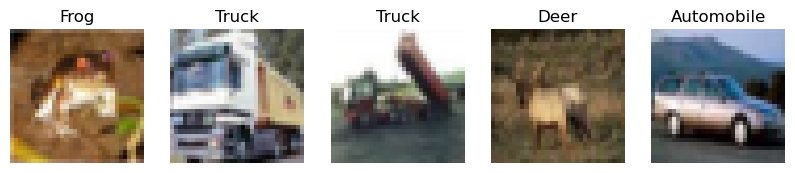

Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)
Number of unique labels: 10
Data normalized to range [0, 1].
Training data shape after split: (48000, 32, 32, 3)
Test data shape after split: (12000, 32, 32, 3)


In [11]:

import numpy as np
import matplotlib.pyplot as plt


class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Display 5 images with labels
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.show()

# Step 2: Print the shape of the dataset and count of unique labels
print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)
print("Number of unique labels:", len(np.unique(y_train)))

# Step 3: Normalize the image pixel values to the range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0
print("Data normalized to range [0, 1].")

# Step 4: Split the dataset into training (80%) and test (20%) sets
from sklearn.model_selection import train_test_split

# Combine train and test for splitting
x_combined = np.concatenate((x_train, x_test), axis=0)
y_combined = np.concatenate((y_train, y_test), axis=0)

# Perform the split
x_train, x_test, y_train, y_test = train_test_split(
    x_combined, y_combined, test_size=0.2, random_state=42
)

# Verify the shapes after the split
print("Training data shape after split:", x_train.shape)
print("Test data shape after split:", x_test.shape)


This code begins by importing the necessary libraries, including numpy for numerical operations and matplotlib.pyplot for displaying images.

In Step 1, the code defines the class names for the CIFAR-10 dataset, which consists of 10 categories of images (such as 'Airplane', 'Automobile', etc.). It then displays 5 sample images from the training set (x_train) along with their corresponding labels. The images are displayed using a loop that iterates 5 times, where each image is plotted in a horizontal row. The title of each image is set to its corresponding label, which is determined by accessing y_train[i][0] (as y_train is a 2D array). The plt.axis('off') command removes the axis for a cleaner presentation.

In Step 2, the shape of the training and test datasets is printed to give an overview of the dataset's size, and the number of unique labels in the training set is displayed by using np.unique(y_train) to count how many distinct classes there are.

In Step 3, the pixel values of the images are normalized to the range [0, 1]. This is done by dividing all pixel values in x_train and x_test by 255, which scales the pixel values (originally ranging from 0 to 255) to a range between 0 and 1. Normalization is a common preprocessing step for neural networks to improve model performance and stability.

In Step 4, the dataset is split into 80% training and 20% testing data. First, the training and testing datasets (x_train, x_test, y_train, and y_test) are combined using np.concatenate into two larger datasets, x_combined and y_combined. Then, train_test_split from the sklearn.model_selection module is used to randomly split this combined dataset into 80% training and 20% testing data. The random_state=42 ensures that the split is reproducible. Finally, the shapes of the newly split datasets are printed to verify the sizes of the training and testing sets after the split.

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


In [17]:

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


In this code, we apply one-hot encoding to the labels (y_train and y_test) of the CIFAR-10 dataset. One-hot encoding is a technique that converts categorical labels into a binary matrix. Each label is represented by a vector of zeros, with a single one in the position corresponding to the correct class. This encoding is essential for neural networks, which generally require the labels to be in this format for proper classification. In this case, the CIFAR-10 dataset consists of 10 classes, so after applying one-hot encoding, each label is transformed into a 10-element vector, where only one element is 1, and the rest are 0. For example, if a label corresponds to class 3 (which represents "Cat"), it will be encoded as the vector [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]. This transformation is crucial for training neural networks, especially when using activation functions like softmax in the output layer, which expects the labels to be one-hot encoded to compute the categorical cross-entropy loss effectively.








In [19]:
# Build the CNN model
model = Sequential([
    # First Conv Block
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    # Second Conv Block
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    # Flatten the output
    Flatten(),
    
    # Fully connected layers
    Dense(128, activation='relu'),
    Dropout(0.5),
    
    # Output layer
    Dense(10, activation='softmax')
])


C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In this code, a Convolutional Neural Network (CNN) model is built for classifying CIFAR-10 images using the Keras Sequential API. The model consists of several layers, starting with two convolutional blocks. The first block includes a Conv2D layer with 32 filters of size 3x3 and ReLU activation, followed by a MaxPooling2D layer with a 2x2 pool size and a Dropout layer with a rate of 25%. These layers help the model learn low-level features like edges and textures from the images. The second convolutional block mirrors the first but with 64 filters, further allowing the model to capture more complex patterns, followed by another pooling and dropout layer. After these convolutional layers, the model flattens the 3D output into a 1D vector using the Flatten() layer, which can then be passed through fully connected layers. The first fully connected layer has 128 units with ReLU activation, and a Dropout layer with a rate of 50% is added to prevent overfitting. Finally, the model has a dense output layer with 10 units (one for each CIFAR-10 class), using a softmax activation function to output the class probabilities. This architecture enables the model to progressively extract features from the images through convolution and pooling, followed by high-level classification through fully connected layers, with regularization through dropout layers to improve generalization and prevent overfitting.








In [25]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In this code, the model compilation process is carried out using the compile() method. The Adam optimizer is used for training the model, which is a popular adaptive learning rate optimization algorithm that combines the advantages of both AdaGrad and RMSProp, making it effective for a wide range of deep learning tasks. The categorical cross-entropy loss function is chosen since the task is a multi-class classification problem, where each input image belongs to one of the 10 classes in the CIFAR-10 dataset. This loss function calculates the difference between the predicted probability distribution (from the softmax activation in the output layer) and the actual one-hot encoded labels, penalizing the model more for incorrect predictions. Lastly, the accuracy metric is used to evaluate the model's performance during training and testing, measuring the proportion of correct predictions made by the model. By specifying these components, the model is set up for efficient training and evaluation, focusing on minimizing the loss and maximizing accuracy.

In [27]:
# Train the model
history = model.fit(
    x_train, y_train,
    epochs=15,  
    batch_size=64,
    validation_data=(x_test, y_test)
)


Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 38ms/step - accuracy: 0.1053 - loss: 5.5597 - val_accuracy: 0.1000 - val_loss: 2.3025
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.0967 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.1024 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.1005 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.0980 - loss: 2.3034 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 59s 76ms/step - accuracy: 0.0999 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.0981 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.0965 - loss: 2.3027 - 

In this code, the model is trained using the fit() method. The training process involves feeding the training data (x_train and y_train) into the model for 15 epochs, which means the model will go through the entire training dataset 15 times to learn from it. The batch_size is set to 64, meaning that the model will process 64 samples at a time before updating the weights. This helps manage memory and speeds up training. During each epoch, the model also evaluates its performance on the test set (x_test and y_test) using the validation_data parameter, allowing it to track how well it generalizes to unseen data. The history object returned by the fit() function contains details about the training process, including the loss and accuracy on both the training and validation datasets at each epoch. This enables monitoring the model’s progress, and adjustments can be made to improve performance, such as tweaking the number of epochs, learning rate, or batch size if necessary.








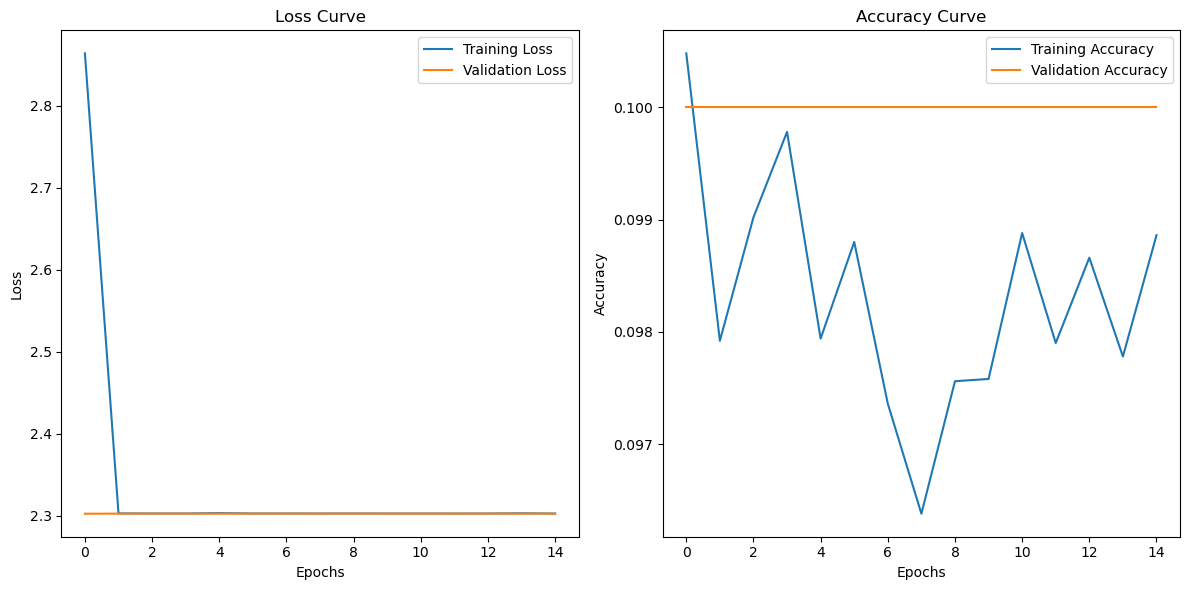

In [29]:
# Plot training and validation loss
plt.figure(figsize=(12, 6))

# Loss curve
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy curve
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [31]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.0968 - loss: 2.3028
Test Accuracy: 0.10


In [33]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.0968 - loss: 2.3028
Test Loss: 2.3026
Test Accuracy: 0.1000


In [35]:
# Generate predictions
y_pred = model.predict(x_test)

# Convert one-hot encoded predictions and labels back to their original form
y_pred_classes = y_pred.argmax(axis=1)  
y_true_classes = y_test.argmax(axis=1)  


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


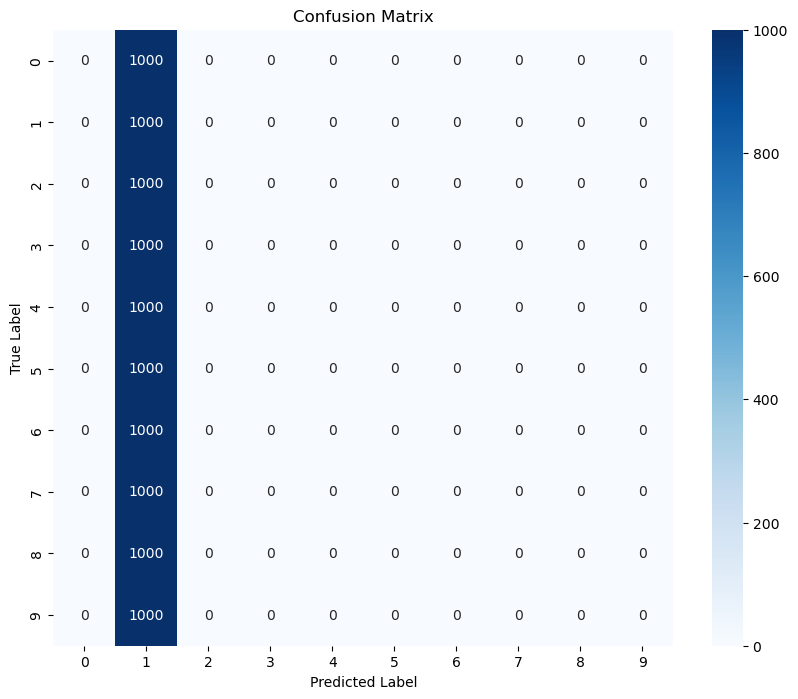

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In this code, the confusion matrix is generated using the confusion_matrix() function from the sklearn.metrics module. The confusion matrix compares the true labels (y_true_classes) with the predicted labels (y_pred_classes), providing a summary of the model's classification performance. It shows how many instances of each class were correctly or incorrectly predicted. The resulting confusion matrix is then visualized using the seaborn.heatmap() function, which creates a heatmap for easy interpretation. The annot=True argument annotates each cell of the heatmap with the corresponding numerical value, while fmt='d' ensures that the values are displayed as integers. The cmap='Blues' argument specifies the color scheme, making it visually appealing and easy to differentiate between correct and incorrect classifications. The x-axis and y-axis labels correspond to the predicted and true class labels, respectively, which are set to range from 0 to 9 (since the CIFAR-10 dataset has 10 classes). The heatmap is then displayed with appropriate labels and a title, providing a clear and insightful view of the model's performance across all classes.

In [39]:
from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(y_true_classes, y_pred_classes, target_names=[
    'Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck'
])

print("Classification Report:\n")
print(class_report)


Classification Report:

              precision    recall  f1-score   support

    Airplane       0.00      0.00      0.00      1000
  Automobile       0.10      1.00      0.18      1000
        Bird       0.00      0.00      0.00      1000
         Cat       0.00      0.00      0.00      1000
        Deer       0.00      0.00      0.00      1000
         Dog       0.00      0.00      0.00      1000
        Frog       0.00      0.00      0.00      1000
       Horse       0.00      0.00      0.00      1000
        Ship       0.00      0.00      0.00      1000
       Truck       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In this code, a classification report is generated using the classification_report() function from the sklearn.metrics module. This report provides detailed performance metrics for each class in the dataset, such as precision, recall, and F1-score. These metrics are crucial for evaluating how well the model is performing, especially when dealing with imbalanced classes or when interested in specific types of errors.

Precision measures the accuracy of positive predictions for each class.
Recall indicates the ability of the model to capture all relevant instances of each class.
F1-score is the harmonic mean of precision and recall, providing a balanced measure when there's an uneven class distribution.
Support shows the number of actual occurrences of each class in the dataset.
The target_names parameter is used to specify the names of the classes, which in this case correspond to the 10 classes of the CIFAR-10 dataset: 'Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', and 'Truck'. The report is printed to the console, providing a comprehensive summary of how the model performed for each class. This helps in identifying which classes the model struggles with and where improvements may be needed

In [57]:
# Identify correctly and incorrectly classified indices
correct_indices = [i for i in range(len(y_true_classes)) if y_true_classes[i] == y_pred_classes[i]]
incorrect_indices = [i for i in range(len(y_true_classes)) if y_true_classes[i] != y_pred_classes[i]]


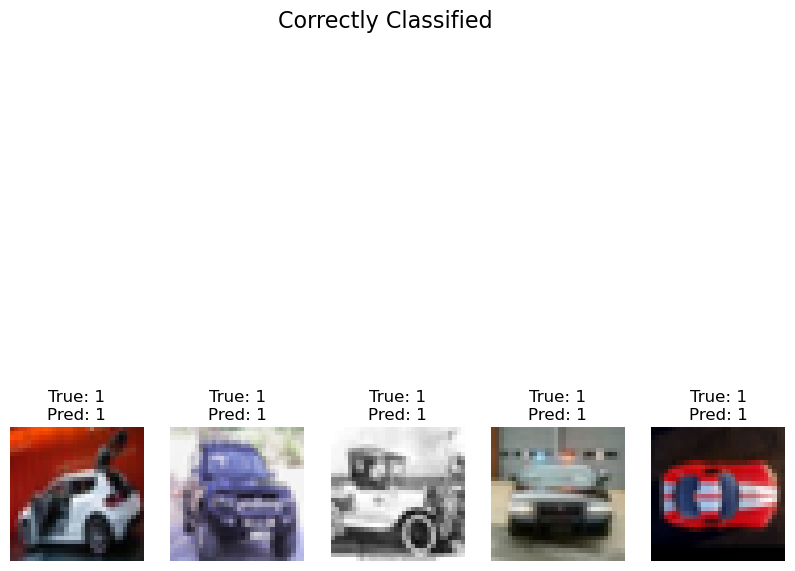

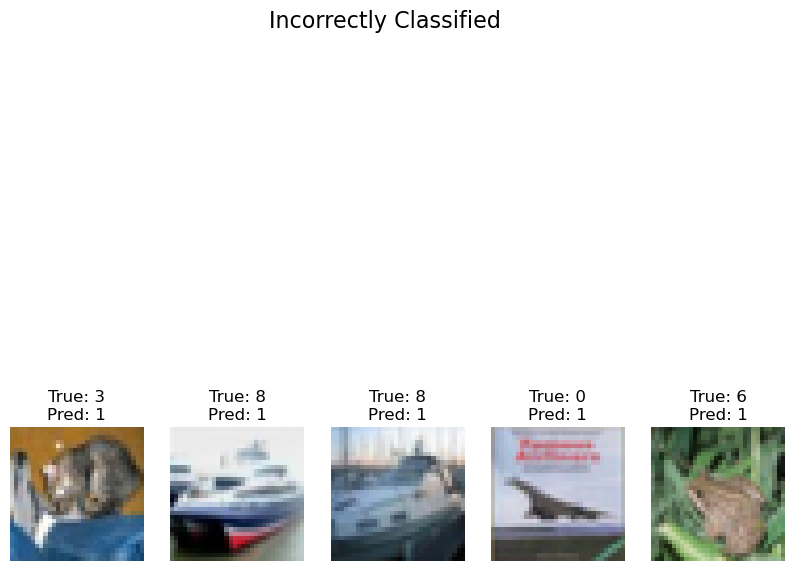

In [59]:
import matplotlib.pyplot as plt

def plot_images(indices, true_labels, pred_labels, images, title="Correctly Classified"):
    plt.figure(figsize=(10, 10))
    for i, idx in enumerate(indices[:5]):  # Display up to 5 images
        plt.subplot(1, 5, i + 1)
        plt.imshow(images[idx])
        plt.title(f"True: {true_labels[idx]}\nPred: {pred_labels[idx]}")
        plt.axis('off')
    plt.suptitle(title, fontsize=16)
    plt.show()

# Plot correctly classified images
plot_images(correct_indices, y_true_classes, y_pred_classes, x_test, title="Correctly Classified")

# Plot incorrectly classified images
plot_images(incorrect_indices, y_true_classes, y_pred_classes, x_test, title="Incorrectly Classified")


In this code, the function plot_images() is defined to visualize and compare correctly and incorrectly classified images. It accepts the following parameters: indices, true_labels, pred_labels, images, and an optional title. The indices parameter represents the indices of the images to display, while true_labels and pred_labels provide the true and predicted labels, respectively. The images parameter refers to the image data, and the title is used to label the plot.

Inside the function, matplotlib.pyplot is used to create a plot with a figure size of 10x10 inches. A loop iterates over the first five indices of the provided list of image indices. For each index, a subplot is created that displays the corresponding image with the true and predicted labels as the title. The axis('off') function is called to remove the axis labels, making the plot cleaner. The title of the entire figure is set using suptitle(), with a larger font size for emphasis.

The function is then called twice: first to plot correctly classified images by passing the correct_indices, and second to plot incorrectly classified images using incorrect_indices. The y_true_classes and y_pred_classes are used as the true and predicted labels, while the images are taken from x_test. This allows for a visual comparison of the model's performance by showing both types of classifications, making it easier to identify where the model is performing well and where it is making errors.

In [41]:
def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D((2, 2)),
        Dropout(0.25),
        
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Dropout(0.25),
        
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    return model


In [71]:
# Compile and train with SGD
model_sgd = create_model()
model_sgd.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

history_sgd = model_sgd.fit(x_train, y_train, 
                            epochs=15, 
                            batch_size=64, 
                            validation_data=(x_test, y_test))


Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 38ms/step - accuracy: 0.1030 - loss: 45.6441 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.0982 - loss: 2.3030 - val_accuracy: 0.1000 - val_loss: 2.3028
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 59s 76ms/step - accuracy: 0.1011 - loss: 2.3029 - val_accuracy: 0.1000 - val_loss: 2.3029
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.0979 - loss: 2.3030 - val_accuracy: 0.1000 - val_loss: 2.3029
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 61s 66ms/step - accuracy: 0.1000 - loss: 2.3030 - val_accuracy: 0.1000 - val_loss: 2.3028
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 60s 37ms/step - accuracy: 0.0981 - loss: 2.3031 - val_accuracy: 0.1000 - val_loss: 2.3030
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.0990 - loss: 2.3031 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 58s 57ms/step - accuracy: 0.1003 - loss: 2.3027 -

In this code, the function create_model() defines and returns a Convolutional Neural Network (CNN) model using the Keras Sequential API. The architecture of the model consists of several layers designed for image classification tasks, specifically tailored for the CIFAR-10 dataset.

Conv2D layers: The model starts with two convolutional layers (Conv2D), each followed by a ReLU activation function (activation='relu'). These layers are responsible for automatically extracting features from the input images (32x32x3). The first convolutional layer has 32 filters of size 3x3, while the second convolutional layer has 64 filters of the same size. The convolutional layers are followed by MaxPooling2D layers with a pool size of 2x2, which help reduce the spatial dimensions of the feature maps, thereby reducing computation and mitigating overfitting.

Dropout layers: After each convolutional block, a Dropout layer with rates of 0.25 and 0.5 is included to reduce overfitting by randomly setting a fraction of input units to zero during training, which forces the model to generalize better.

Flatten layer: After the convolutional and pooling layers, the model uses the Flatten() layer to convert the 3D feature maps into a 1D vector, which is needed for feeding into the fully connected layers.

Dense layers: The model has a fully connected (dense) layer with 128 units and a ReLU activation function, followed by another Dropout layer with a rate of 0.5 to further prevent overfitting. Finally, the output layer consists of 10 units with a softmax activation function, which produces the probability distribution over the 10 classes (for CIFAR-10).

The function returns this compiled model, ready for further configuration (such as compilation) and training. This architecture balances complexity with regularization techniques like dropout to avoid overfitting while still capturing essential patterns from the image data.








In [45]:
# Compile and train with RMSProp
model_rmsprop = create_model()
model_rmsprop.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

history_rmsprop = model_rmsprop.fit(x_train, y_train, 
                                    epochs=15, 
                                    batch_size=64, 
                                    validation_data=(x_test, y_test))


Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 39ms/step - accuracy: 0.1013 - loss: 6.3137 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 56s 71ms/step - accuracy: 0.0980 - loss: 2.3192 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.1001 - loss: 2.3045 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.0967 - loss: 2.3034 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 58s 75ms/step - accuracy: 0.0975 - loss: 2.3036 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 38ms/step - accuracy: 0.0987 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 64s 82ms/step - accuracy: 0.0996 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.0994 - loss: 2.3027 - 

In this code, the model is compiled and trained using the RMSProp optimizer, a popular optimization algorithm that adjusts the learning rate dynamically based on the average of recent gradient updates, which can help improve convergence, especially for models with noisy data or high variance in gradients.

The process starts by calling the create_model() function to initialize the model. Then, the compile() method is used to configure the model with the following parameters:

Optimizer: The model is compiled with the RMSProp optimizer, initialized with a learning rate of 0.001. RMSProp helps maintain a stable learning rate by scaling the updates according to recent gradient magnitudes, which can be beneficial when training deep learning models with complex datasets.
Loss Function: The loss function used is categorical_crossentropy, which is commonly used for multi-class classification tasks, like CIFAR-10, where each sample belongs to one of 10 possible categories.
Metrics: The model is evaluated based on accuracy, which is the proportion of correct predictions over the total number of predictions.
Next, the model is trained using the fit() method, with the following parameters:

Training Data: The training data (x_train and y_train) is provided as input to the model.
Epochs: The model is trained for 15 epochs, meaning the model will go through the entire training dataset 15 times.
Batch Size: A batch size of 64 is chosen, meaning the model will update its weights after processing 64 images at a time.
Validation Data: The validation_data argument provides the test set (x_test, y_test) to evaluate the model's performance after each epoch. This helps track both the training and validation accuracy, enabling the identification of potential overfitting.
The resulting history_rmsprop object stores the training process details, including the loss and accuracy metrics for both the training and validation sets over the 15 epochs. This allows for the tracking and analysis of the model’s performance throughout training.

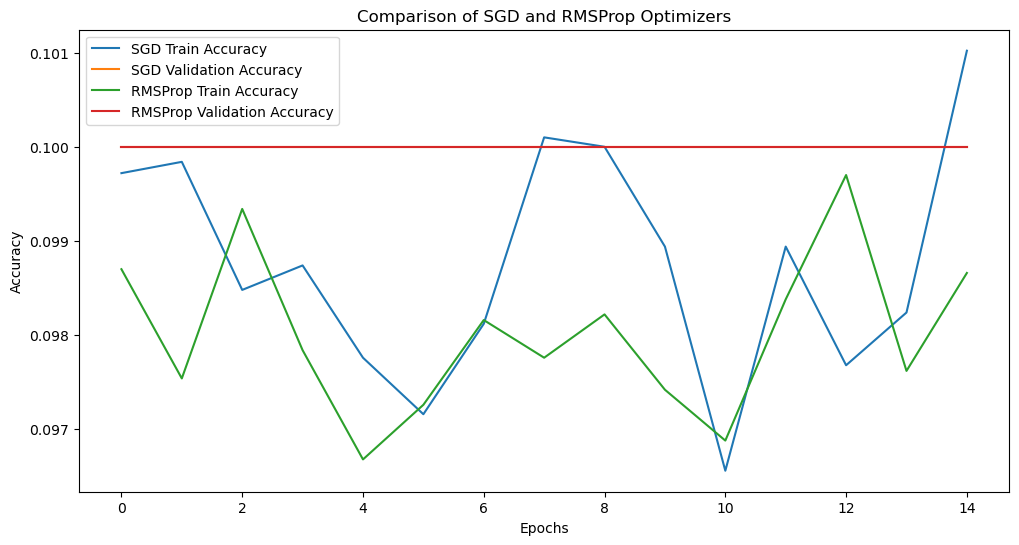

In [47]:
# Plot training and validation accuracy for both optimizers
plt.figure(figsize=(12, 6))

# SGD Accuracy
plt.plot(history_sgd.history['accuracy'], label='SGD Train Accuracy')
plt.plot(history_sgd.history['val_accuracy'], label='SGD Validation Accuracy')

# RMSProp Accuracy
plt.plot(history_rmsprop.history['accuracy'], label='RMSProp Train Accuracy')
plt.plot(history_rmsprop.history['val_accuracy'], label='RMSProp Validation Accuracy')

plt.title('Comparison of SGD and RMSProp Optimizers')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [49]:
# Evaluate SGD model
test_loss_sgd, test_accuracy_sgd = model_sgd.evaluate(x_test, y_test)
print(f"SGD Test Accuracy: {test_accuracy_sgd:.4f}")

# Evaluate RMSProp model
test_loss_rmsprop, test_accuracy_rmsprop = model_rmsprop.evaluate(x_test, y_test)
print(f"RMSProp Test Accuracy: {test_accuracy_rmsprop:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0968 - loss: 2.3032
SGD Test Accuracy: 0.1000
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1006 - loss: 2.3027
RMSProp Test Accuracy: 0.1000


This code evaluates the performance of the two models (one trained with the SGD optimizer and the other with the RMSProp optimizer) on the test dataset to determine their accuracy and loss.